##support vector machine is a classification  and regression model

In [2]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import pickle

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
dir = "E:\\third year\\selected1_project\\archive (1)\\Training"

In [5]:
from matplotlib import pyplot
from matplotlib.image import imread

In [7]:
categories = ['female','male']

data = []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        gender_img = cv2.imread(img_path,0)
        gender_img=cv2.resize(gender_img,(50,50)) # change the size of images.
        image = np.array(gender_img).flatten()
        data.append([image,label])
print(len(data))
        
print(label)
       


47009
1


In [8]:
pick_in = open('E:\\third year\\selected1_project\\archive (1)\\Training\\data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [9]:
pick_in = open('E:\\third year\\selected1_project\\archive (1)\\Training\\data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

In [10]:
import svm
from sklearn.svm import SVC #  call support vector classifier

The accuracy is  0.89543095379903
prediction is :  female


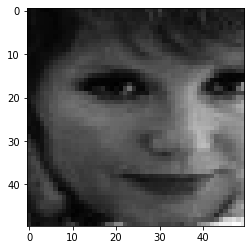

In [11]:
import random
random.shuffle(data)
features = []
labels = []
loss="hinge"
optimizer = "SGD"
Max_iter=20
    
for feature , label in data:
    features.append(feature)
    labels.append(label)
    
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, shuffle=True,random_state=42)      
model =  SVC(C=1,kernel='poly',gamma='auto')
model.fit(x_train,y_train)
pick = open('E:\\third year\\selected1_project\\archive (1)\\Training\\model.sav','wb')
pickle.dump(model,pick)
pick.close()

prediction=model.predict(x_test)
accuracy = model.score(x_test, y_test)

categories = ['female','male']

print('The accuracy is ', accuracy)

print ('prediction is : ', categories[prediction[0]])

myGender=x_test[0].reshape(50,50)

plt.imshow(myGender,cmap='gray')
plt.show()

# confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
import numpy
y_predict = model.predict(x_test) 
confusion_matrix(y_test,y_predict)
confusion_matrix(y_test,y_predict).ravel()


array([5149,  618,  611, 5375], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5767
           1       0.90      0.90      0.90      5986

    accuracy                           0.90     11753
   macro avg       0.90      0.90      0.90     11753
weighted avg       0.90      0.90      0.90     11753



# roc curve

In [17]:
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)
import sklearn.metrics as metrics


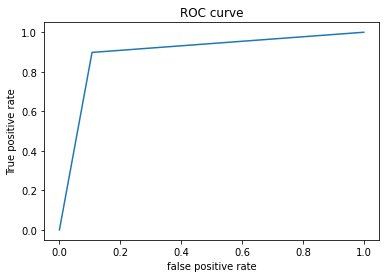

In [27]:
prediction
y_valid=y_test
fpr1,tpr1,thresholds=metrics.roc_curve(y_valid,prediction,pos_label=0)
plt.ylabel("True positive rate")
plt.xlabel("false positive rate") 
plt.title("ROC curve")
plt.plot(tpr1,fpr1)
plt.show()

In [28]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
